In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df = pd.read_csv("sports_betting_predictive_analysis.csv")

In [3]:
df_clean = df.dropna(subset=['Home_Team_Odds', 'Away_Team_Odds', 'Actual_Winner'])

In [4]:
df_clean = df.copy()
le = LabelEncoder()
df_clean['Sport_code'] = le.fit_transform(df_clean['Sport'])
df_clean['Home_Team_code'] = le.fit_transform(df_clean['Home_Team'])
df_clean['Away_Team_code'] = le.fit_transform(df_clean['Away_Team'])
df_clean['Winner_code'] = le.fit_transform(df_clean['Actual_Winner'])

In [5]:
X = df_clean[['Home_Team_Odds', 'Away_Team_Odds', 'Draw_Odds',
              'Sport_code', 'Home_Team_code', 'Away_Team_code']].fillna(0)
y = df_clean['Winner_code']

In [6]:
ros = RandomOverSampler(random_state=42)
X_resampled , y_resampled = ros.fit_resample(X , y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [7]:
X_train , X_test , y_train , y_test = tts(X_resampled , y_resampled ,
                                         test_size = 0.2 , stratify = y_resampled)

In [8]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',
    class_weight='balanced',
)

In [9]:
model.fit(X_resampled , y_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=10)

In [10]:
y_pred = model.predict(X_test)

# Confusion Matrix

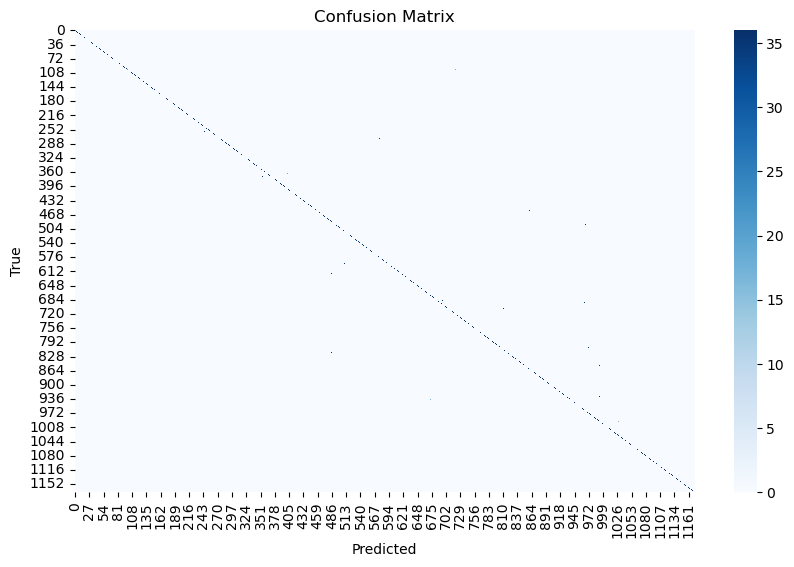

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, cmap='Blues', annot=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Feature Importance

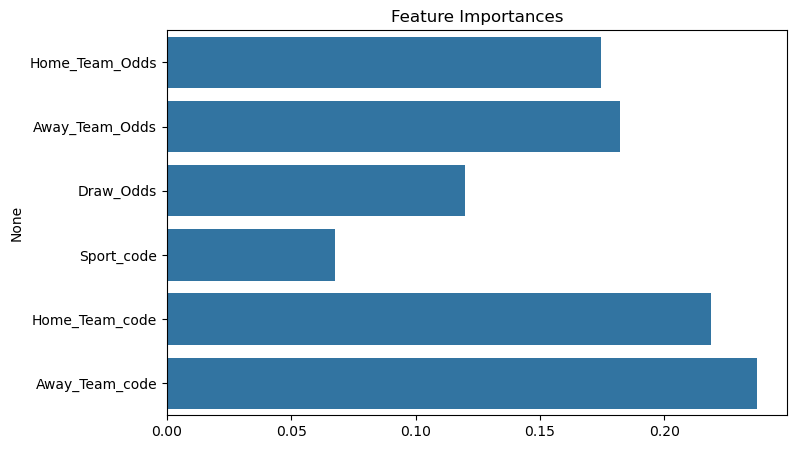

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importances")
plt.show()

# Learning Curve

In [16]:
#train_sizes, train_scores, test_scores = learning_curve(
#    model, X_resampled, y_resampled, cv=5, scoring='f1_macro'
#)
#plt.figure(figsize=(8,5))
#plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
#plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')
#plt.title("Learning Curve (F1_macro)")
#plt.xlabel("Training Examples")
#plt.ylabel("F1 Score")
#plt.legend()
#plt.grid()
#plt.show()

# Save Model

In [17]:
joblib.dump(model , 'sports_betting_predictive_analysis.pk1')

['sports_betting_predictive_analysis.pk1']